# INTRODUCTION



> Ever heard of the terminologies like used car, a pre-owned vehicle or a second hand car?  <br>
> 
> Used cars are sold through a varirty of outlets, including franchise, independent car dealers and rental car companies.Have you ever wondered how their prices are evaluated for sale?
> 
> You cannot take a wild guess at this because the Indian used car market was valued at USD 24.24 billion in 2019. 
> Let's build a model that helps the vendors evaluate the used cars.

In [35]:
#Importing the necessary libraries

import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.feature_selection import *
from sklearn.metrics import *
from sklearn.tree import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.linear_model import *
import xgboost as xgb

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#To avoid unnecessary warning
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
        



/kaggle/input/used-cars-price-prediction/test-data.csv
/kaggle/input/used-cars-price-prediction/train-data.csv


# DATA GATHERING 

In [56]:
train = pd.read_csv('../input/used-cars-price-prediction/train-data.csv',index_col= 0)
train = train.reindex(np.random.permutation(train.index))
print("TRAIN SHAPE: ",train.shape)
train.info()
train.head()

TRAIN SHAPE:  (6019, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 259 to 3645
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
259,Hyundai Grand i10 Magna,Mumbai,2014,16514,Petrol,Manual,First,18.9 kmpl,1197 CC,82 bhp,5.0,NaN,3.75
5891,Tata Indigo CS eGLX BS IV,Pune,2015,83000,Petrol,Manual,First,15.64 kmpl,1193 CC,64.08 bhp,5.0,NaN,2.70
175,Volkswagen Vento Petrol Highline AT,Mumbai,2013,21000,Petrol,Automatic,Second,14.4 kmpl,1598 CC,103.6 bhp,5.0,NaN,4.45
3006,Jeep Compass 2.0 Limited,Pune,2018,16039,Diesel,Manual,First,17.1 kmpl,1956 CC,170 bhp,5.0,23.89 Lakh,18.50
1478,Maruti Alto K10 LXI,Delhi,2015,51000,Petrol,Manual,First,20.92 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [57]:
test = pd.read_csv('../input/used-cars-price-prediction/test-data.csv',index_col= 0)
print(test.shape)
print(test.info())
test.head()

(1234, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 125.3+ KB
None


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


# DATA CLEANING AND ASSESSMENT

Ensure to apply the changes to both the test and train sets inorder to maintain uniformity.

##### Quality issue 1:  Missing values

We can see that there are missing values in the following columns:
* Engine          
* Power            
* Seats  
* New_Price          

In [58]:
#percentage of missing values
percent_missing = train.isnull().sum() * 100 / len(train)
print(percent_missing)

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64


In [59]:
percent_missing = test.isnull().sum() * 100 / len(test)
print(percent_missing)

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.000000
Engine                0.810373
Power                 0.810373
Seats                 0.891410
New_Price            85.251216
dtype: float64


In [60]:
#dropping the "New_Price" column that has 86.3% of missing values 

train.drop(columns =['New_Price'],axis =1, inplace = True)
test.drop(columns =['New_Price'],axis =1, inplace = True)

In [61]:
#Mileage attribute has the least percentage of missing values. Let's fill them up manually.

train[train['Mileage'].isnull()]



,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [62]:
#Thanks to Google!

train.loc[4904, 'Mileage']  = '23.91 kmpl' 
train.loc[4446, 'Mileage']  = '140 kmpl'

In [63]:
#Now,let's drop the rest of the rows with missing values 


train.dropna(how ='any',inplace = True)
test.dropna(how ='any',inplace = True)

In [64]:
#CHECKING IF ALL THE MISSING VALUES ARE TAKEN CARE OF
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5977 entries, 259 to 3645
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5977 non-null   object 
 1   Location           5977 non-null   object 
 2   Year               5977 non-null   int64  
 3   Kilometers_Driven  5977 non-null   int64  
 4   Fuel_Type          5977 non-null   object 
 5   Transmission       5977 non-null   object 
 6   Owner_Type         5977 non-null   object 
 7   Mileage            5977 non-null   object 
 8   Engine             5977 non-null   object 
 9   Power              5977 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              5977 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 607.0+ KB


In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1223 non-null   object 
 1   Location           1223 non-null   object 
 2   Year               1223 non-null   int64  
 3   Kilometers_Driven  1223 non-null   int64  
 4   Fuel_Type          1223 non-null   object 
 5   Transmission       1223 non-null   object 
 6   Owner_Type         1223 non-null   object 
 7   Mileage            1223 non-null   object 
 8   Engine             1223 non-null   object 
 9   Power              1223 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 114.7+ KB


##### Quality issue 2:  Erroneous values and datatypes

Some of our attributes' datatypes could be changed inorder to make the modelling process easier. Those attributes are 
* Mileage
* Engine
* Power
* Year

In [66]:
#Mileage - Before we change the datatype, we must extract the actual mileage in numbers without the "Kmpl" 
train['Mileage']= train['Mileage'].str[:-5]
train['Mileage']=train['Mileage'].astype(float);

test['Mileage']= test['Mileage'].str[:-5]
test['Mileage']=test['Mileage'].astype(float);

In [67]:
#Engine - Before we change the datatype, we must extract the actual engine cc in numbers without the "CC" string 

train['Engine'] = train['Engine'].str.strip('CC')
train['Engine']= train['Engine'].astype(float);

test['Engine'] = test['Engine'].str.strip('CC')
test['Engine']= test['Engine'].astype(float);

In [69]:
train['Power'] = train['Power'].fillna(value = "null")
train["Power"]= train["Power"].replace("null", "NaN")
train['Power'] = train['Power'].str.strip('bhp ')
train['Power'] = train['Power'].astype(float)

train.dropna(how ='any',inplace = True)

In [71]:
test['Power'] = test['Power'].fillna(value = "null")
test["Power"]= test["Power"].replace("null", "NaN")
test['Power'] = test['Power'].str.strip('bhp ')
test['Power'] = test['Power'].astype(float)

test.dropna(how ='any',inplace = True)

In [72]:
#Year
train['Year'] = train['Year'].astype(str)

test['Year'] = test['Year'].astype(str)


In [73]:
#CHECKING
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 259 to 1634
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5874 non-null   object 
 1   Location           5874 non-null   object 
 2   Year               5874 non-null   object 
 3   Kilometers_Driven  5874 non-null   int64  
 4   Fuel_Type          5874 non-null   object 
 5   Transmission       5874 non-null   object 
 6   Owner_Type         5874 non-null   object 
 7   Mileage            5874 non-null   float64
 8   Engine             5874 non-null   float64
 9   Power              5874 non-null   float64
 10  Seats              5874 non-null   float64
 11  Price              5874 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 596.6+ KB


In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1201 non-null   object 
 1   Location           1201 non-null   object 
 2   Year               1201 non-null   object 
 3   Kilometers_Driven  1201 non-null   int64  
 4   Fuel_Type          1201 non-null   object 
 5   Transmission       1201 non-null   object 
 6   Owner_Type         1201 non-null   object 
 7   Mileage            1201 non-null   float64
 8   Engine             1201 non-null   float64
 9   Power              1201 non-null   float64
 10  Seats              1201 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 112.6+ KB


In [75]:
train.to_csv('trainfinal.csv')
test.to_csv('testfinal.csv')

# Feature engineering

In [76]:
x = pd.read_csv('trainfinal.csv')
print(x.shape)
x.head()

(5874, 13)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,259,Hyundai Grand i10 Magna,Mumbai,2014,16514,Petrol,Manual,First,18.90,1197.0,82.00,5.0,3.75
1,5891,Tata Indigo CS eGLX BS IV,Pune,2015,83000,Petrol,Manual,First,15.64,1193.0,64.08,5.0,2.70
2,175,Volkswagen Vento Petrol Highline AT,Mumbai,2013,21000,Petrol,Automatic,Second,14.40,1598.0,103.60,5.0,4.45
3,3006,Jeep Compass 2.0 Limited,Pune,2018,16039,Diesel,Manual,First,17.10,1956.0,170.00,5.0,18.50
4,1478,Maruti Alto K10 LXI,Delhi,2015,51000,Petrol,Manual,First,20.92,998.0,67.10,5.0,2.65


In [77]:
#dropping the unnamed:0 column
x.drop(columns=['Unnamed: 0'],axis=1,inplace = True)

**The name column has a diverse number of values. 
Let's break it down and extract the brand name of the car.**


In [78]:
x["breakdown"] = x.Name.str.split(" ")
x["breakdown"].head()

0                 [Hyundai, Grand, i10, Magna]
1             [Tata, Indigo, CS, eGLX, BS, IV]
2    [Volkswagen, Vento, Petrol, Highline, AT]
3                [Jeep, Compass, 2.0, Limited]
4                     [Maruti, Alto, K10, LXI]
Name: breakdown, dtype: object

In [79]:
#Lets store the brand name in our new column
brand_list=[]
for i in range(len(x)):
    a = x.breakdown[i][0]
    brand_list.append(a)

x['Brand'] = brand_list

In [80]:
# We don't need these columns now
x.drop(columns=['Name','breakdown'],axis=1,inplace=True)

In [81]:
#Lets analyse the new attribute
x['Brand'].unique()

array(['Hyundai', 'Tata', 'Volkswagen', 'Jeep', 'Maruti', 'Toyota', 'BMW',
       'Honda', 'Audi', 'Ford', 'Renault', 'Mercedes-Benz', 'Porsche',
       'Mahindra', 'Chevrolet', 'Skoda', 'Volvo', 'Mitsubishi', 'Land',
       'Jaguar', 'Nissan', 'Datsun', 'Mini', 'Fiat', 'Ambassador',
       'ISUZU', 'Force', 'Lamborghini', 'Isuzu', 'Bentley'], dtype=object)

We can see that "Isuzu" carries some duplicated values. 
<br>
Let's sort that out

In [82]:
duplic = {'ISUZU': 'Isuzu'}
x.replace({"Brand": duplic},inplace = True) 

In [83]:
#CHECKING
x['Brand'].value_counts()

#Sorted!

Maruti           1175
Hyundai          1058
Honda             600
Toyota            395
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          269
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
Isuzu               3
Lamborghini         1
Ambassador          1
Bentley             1
Name: Brand, dtype: int64

In [84]:
#Lets encode our categorical values 

labelencoder = LabelEncoder()
label_array=[]

label_array = ['Location','Year','Fuel_Type','Transmission','Owner_Type','Brand']

for ele in label_array:
    x[ele] = labelencoder.fit_transform(x[ele])


In [85]:
#CHECKING
x.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,9,16,16514,4,1,0,18.90,1197.0,82.00,5.0,3.75,10
1,10,17,83000,4,1,0,15.64,1193.0,64.08,5.0,2.70,25
2,9,15,21000,4,0,2,14.40,1598.0,103.60,5.0,4.45,27
3,10,20,16039,1,1,0,17.10,1956.0,170.00,5.0,18.50,13
4,4,17,51000,4,1,0,20.92,998.0,67.10,5.0,2.65,17


In [86]:
#feature selection
X_fs = x[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Brand']]

y_fs = x['Price']


y_fs = y_fs*100
y_fs = y_fs.astype(int)


bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_fs,y_fs)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_fs.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
fea = pd.DataFrame(featureScores.nlargest(10,'Score'))
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                Specs         Score
2   Kilometers_Driven  2.646175e+08
7              Engine  8.785410e+05
8               Power  1.170354e+05
10              Brand  6.291769e+03
5          Owner_Type  2.423341e+03
6             Mileage  2.279989e+03
1                Year  2.015923e+03
3           Fuel_Type  2.011687e+03
0            Location  1.808910e+03
4        Transmission  1.002323e+03


Therefore, the most important features are "Kilometers driven" followed by "Engine", "Power", "Brand".

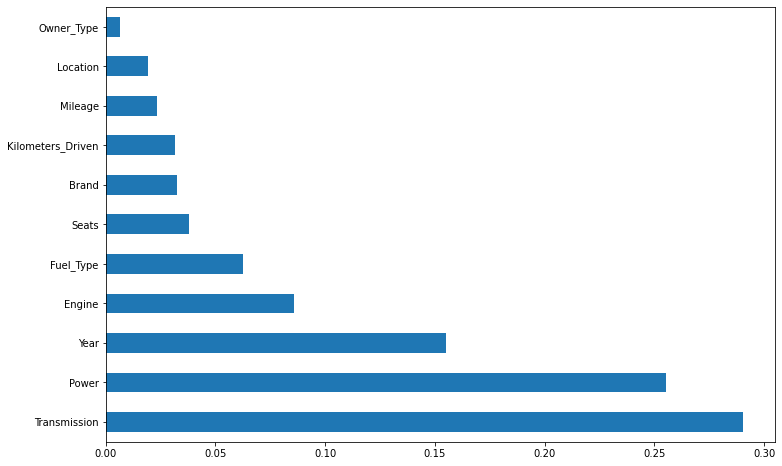

In [89]:
selection= ExtraTreesRegressor()
selection.fit(X_fs,y_fs)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_fs.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


This plot also validates our selection of important features. 

# MODEL BUILDING

In [90]:
#Preparing Training set 
X = np.array(x.drop(['Price'],axis = 1)) 
Y = x.Price.values

In [91]:
#splitting into train and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=25)

In [92]:
#selecting best models

model_selc = [LinearRegression(),
             DecisionTreeRegressor(),
             RandomForestRegressor(n_estimators=10),
             KNeighborsRegressor(),
             GradientBoostingRegressor()]

kfold = RepeatedKFold(n_splits=5, n_repeats=10, random_state= None)
cv_results = []
cv_results_mean =[]
for ele in model_selc:
    cross_results = cross_val_score(ele, X_train, Y_train, cv=kfold, scoring ='r2')
   
    cv_results.append(cross_results)
   
    cv_results_mean.append(cross_results.mean())
    print("\n MODEL: ",ele,"\nMEAN R2:",cross_results.mean() )



 MODEL:  LinearRegression() 
MEAN R2: 0.6403735356335843

 MODEL:  DecisionTreeRegressor() 
MEAN R2: 0.7752812867413708

 MODEL:  RandomForestRegressor(n_estimators=10) 
MEAN R2: 0.8632125513368406

 MODEL:  KNeighborsRegressor() 
MEAN R2: 0.5521518396278482

 MODEL:  GradientBoostingRegressor() 
MEAN R2: 0.8864623537837031


In [93]:
#Let's try xgboost now
my_xgb = xgb.XGBRegressor(objective='reg:linear',learning_rate = 0.1, n_estimators = 100,verbosity = 0,silent=True)
xgb_results = cross_val_score(my_xgb, X_train, Y_train, cv=kfold, scoring ='r2')
print("\n MODEL: XGBOOST","\nMEAN R2:",xgb_results.mean() )


 MODEL: XGBOOST 
MEAN R2: 0.8932368833795319


AND THERE WE HAVE A WINNER TO GO THROUGH GRIDSEARCH FOR HYPER-PARAMTER TUNING!!

 ### Tuning HyperParameters for xgboost

##### GRID SEARCH

Grid Search can be thought of as an exhaustive and computationally expensive method for selecting a model.<br>

**For example** : <br>

Searching 20 different parameter values for each of 4 parameters will require 160,000 trials of cross-validation. This equates to 1,600,000 model fits and 1,600,000 predictions if 10-fold cross validation is used

In [151]:
#We use GridSearch for fine tuning Hyper Parameters

from sklearn.model_selection import *


n_estimator_val = np.arange(100,400,100).astype(int)
max_depth_val = [2,3,4]


grid_params = { 'loss' : ['ls'] ,
               'learning_rate' : [0.1],
               'n_jobs': [-1],
               'n_estimators' : n_estimator_val,
               'max_depth' : max_depth_val
              }

In [95]:
gs = GridSearchCV(xgb.XGBRegressor(silent= True),grid_params,verbose=1,cv=5,n_jobs =-1)
gs_results = gs.fit(X_train,Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   10.3s finished


In [96]:
#To Display the Best Score
gs_results.best_score_

0.9061322241402054

In [97]:
#To Display the Best Estimator
gs_results.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, loss='ls', max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [98]:
#To Display the Best Parameters
gs_results.best_params_

{'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'n_estimators': 300,
 'n_jobs': -1}

We could settle here but let's try randomized search cross validation.

##### RANDOMIZED SEARCH
Randomized Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
This allows you to explicitly control the number of parameter combinations that are attempted. 
The number of search iterations is set based on time or resources. 


While it’s possible that RandomizedSearchCV will not find as accurate of a result as GridSearchCV, it surprisingly picks the best result more often than not and in a fraction of the time it takes GridSearchCV would have taken. Given the same resources, Randomized Search can even outperform Grid Search. 

In [ ]:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=10, missing=None, n_estimators=1900,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1.0, verbosity=1)

In [233]:
folds = 3
param_comb = 10

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

params = { 'n_jobs': [-1],
        'n_estimators' : n_estimator_val,
        'learning_rate' : [0.1],
        'min_child_weight': [9],
        'gamma': [0.5],
        'subsample': [0.6],
        'colsample_bytree': [0.8, 1.0],
        'max_depth': [3, 4]
        }
xgb_regrsv = xgb.XGBRegressor()


In [234]:
random_search = RandomizedSearchCV(xgb_regrsv, params, n_iter=param_comb, scoring='r2', 
                                   n_jobs=-1, cv=5 )


In [235]:
random_search.fit(X_train, Y_train);

In [236]:
random_search.best_score_

0.908207631001647

In [237]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=9, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

After some more time of trying various hyperparameters and tuning,

In [240]:
xgb_tuned = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=9, missing=None, n_estimators=300,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0, verbosity=0)

In [241]:
xgb_tuned.fit(X_train,Y_train)
y_pred =xgb_tuned.predict(X_test)

print("Training set accuracy: ",xgb_tuned.score(X_train,Y_train))
print("Test set accuracy    : ",xgb_tuned.score(X_test,Y_test))

Training set accuracy:  0.975331063780927
Test set accuracy    :  0.9295979697763822


Now, lets check how various metrics have evaluated our model on the test set

In [242]:

print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(Y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(Y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('R Squared Error          : ', r2_score(Y_test, y_pred))

		Error Table
Mean Absolute Error      :  1.304882861800904
Mean Squared  Error      :  7.437938335998906
Root Mean Squared  Error :  2.727258391865154
R Squared Error          :  0.9295979697763822


# CONCLUSION

This model is ready to be deployed in a pipeline. <br>
We have accomplished the task of building a good model for our used cars' prediction purposes. 

We will be adding the exploratory data analysis of the same dataset soon. <br>



##### Please do let us know if you have any constructive feedbacks to help us improve our work.
##### If you guys could learn something from our notebook, do upvote and support us! **
This brings us to the end of our first kaggle notebook. 
